In [1]:
from huggingface_hub import notebook_login

notebook_login()

In [4]:
import torch
from diffusers import DDPMPipeline
import os
from tqdm import tqdm  # For progress bar

# Create output directory
output_dir = "Diffusion_RECAP"
os.makedirs(output_dir, exist_ok=True)

# Load model
pipeline = DDPMPipeline.from_pretrained("otausendschoen/ddpm-our-faces-reduced")

# Move to GPU and use half precision
device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline = pipeline.to(device)
if device == "cuda":
    pipeline = pipeline.to(torch.float16)


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

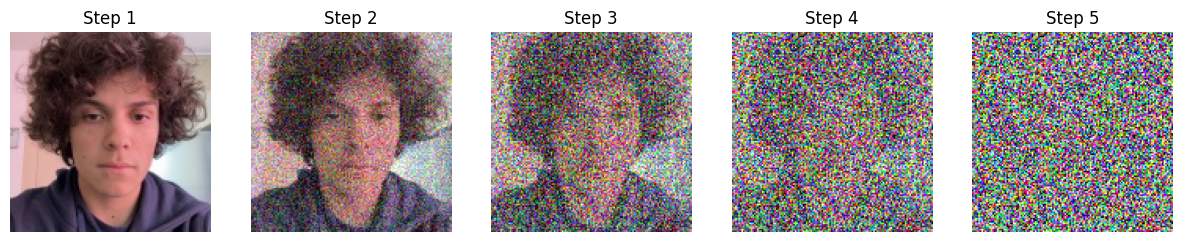

In [13]:

import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

# Load the image
import os


image_path = "frame_0.jpg"  # Change this to your image path
original_image = Image.open(image_path).convert("RGB")

# Transform image to tensor and normalize to [-1, 1] range
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to match training size
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize between -1 and 1
])
image_tensor = transform(original_image).unsqueeze(0)  # Add batch dimension

# Number of noise steps
num_steps = 5  # Adjust as needed
timesteps = torch.linspace(0, 1, num_steps)  # Noise scaling factors

# Generate noise
device = "cuda" if torch.cuda.is_available() else "cpu"
image_tensor = image_tensor.to(device)
noise = torch.randn_like(image_tensor)

# Generate progressively noisier images
fig, axes = plt.subplots(1, num_steps, figsize=(15, 5))
for i, t in enumerate(timesteps):
    noisy_image = (1 - t) * image_tensor + t * noise  # Linear interpolation of noise
    noisy_image = noisy_image.squeeze(0).permute(1, 2, 0).cpu().numpy()  # Convert for plotting
    noisy_image = (noisy_image * 127.5 + 127.5).clip(0, 255).astype(np.uint8)  # Convert back to [0,255]
    
    axes[i].imshow(noisy_image)
    axes[i].axis("off")
    axes[i].set_title(f"Step {i+1}")

plt.show()


In [18]:
print(f"Pipeline uses {pipeline.scheduler.num_train_timesteps} timesteps.")


Pipeline uses 1000 timesteps.


/home/oliver/miniconda3/envs/Diffusion/lib/python3.11/site-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)
